# L1 and L2 Linear Regression

The goal of this notebook is to validate the optimization code in `macaw`.
For that, we will compare results against sklearn's linear regression example on the `diabetes` dataset.
See sklearn's example here: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from macaw.models import LinearModel
from macaw.objective_functions import L1Norm, L2Norm
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [4]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [6]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [7]:
# Create linear model object
model = LinearModel(diabetes_X_train.reshape(-1))

In [8]:
# Train the model using the training sets
l1norm = L1Norm(y=diabetes_y_train.reshape(-1), model=model)
res_l1 = l1norm.fit(x0=[0., 0.])

In [9]:
# Train the model using the training sets
l2norm = L2Norm(y=diabetes_y_train.reshape(-1), model=model)
res_l2 = l2norm.fit(x0=[0., 0.])

In [10]:
# Make predictions using the testing set
diabetes_y_pred_l1 = LinearModel(diabetes_X_test).evaluate(*res_l1.x)
diabetes_y_pred_l2 = LinearModel(diabetes_X_test).evaluate(*res_l2.x)

In [11]:
print('(L1 Norm) Coefficients: \n', res_l1.x)
print('(L2 Norm) Coefficients: \n', res_l2.x)

(L1 Norm) Coefficients: 
 [ 1038.68262063   146.84722666]
(L2 Norm) Coefficients: 
 [ 938.23786125  152.91885622]


In [12]:
print("(L1 Norm) Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_l1))
print("(L2 Norm) Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_l2))

(L1 Norm) Mean squared error: 2296.18
(L2 Norm) Mean squared error: 2548.07


In [13]:
print('(L1 Norm) Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred_l1))
print('(L2 Norm) Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred_l2))

(L1 Norm) Variance score: 0.52
(L2 Norm) Variance score: 0.47


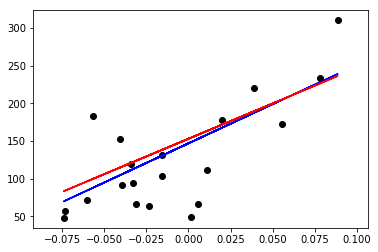

In [14]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='black')
plt.plot(diabetes_X_test, diabetes_y_pred_l1, color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred_l2, color='red')

Note that the L1 norm estimator for this particular linear model and dataset presents a smaller mean squared error when compared against the L1 norm estimator. That is because the L1 norm finds the "median model", and therefore is more robust against outliers, whereas the L2 norm finds the "mean model" which is less robust to the presence of outliers.